The architecture of a network of computers in a banking system is shown below. The architecture is called a skip-ring network and is designed to allow processors to communicate even after node failures have occurred. For example, if node 1 fails, node 8 can bypass the failed node by routing data over the alternative link connecting **nodes 8 and 2**. Assuming the links are perfect and the nodes each have a reliability of Rm, derive and expression for the reliability of the network. If Rm obeys the exponential failure law and the failure rate of each node is **0.005 failures** per hour, determine the reliability of the system at the end of a **48-hour** period.



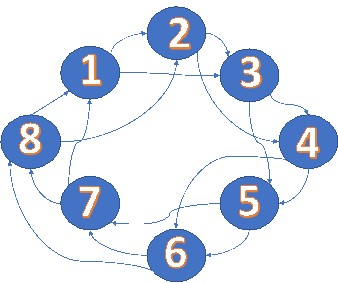

Una prima considerazione che possiamo fare `e che in questo sistema avviene un
fallimento solo quando falliscono due nodi che siano adiacenti. In generale, noi
sappiamo che la probabilità che un nodo funzioni fino ad un tempo t è Rm (Rm
è per ipotesi la reliability di ogni nodo), mentre la probabilità che ogni nodo non funzioni è **$ 1 - R^m $** .


Avremo quindi che per una specifica configurazione, **$ (1 - R^m)^i $**   
nodi non funzioneranno, dove i `e appunto il numero di nodi down, mentre avremo
**$ R_m^{(k-i)} $** nodi che funzioneranno. Per trovare la reliability del sistema totale, si è pensato di utilizzare e adattare la formula che permette di calcolare la Reliability  di un sistema formato da N componenti che richiede almeno M componenti funzionanti per funzionare (**M-out-of-N**). La formula è la seguente:










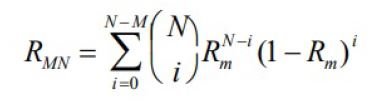


Nel nostro caso, N=8, M=4; il problema è che la formula così come è non va
bene, perchè il coefficiente binomiale tiene conto di tutte le possibili configurazioni dei nodi funzionanti, mentre nel nostro caso non è così: ad esempio, se abbiamo 6 nodi funzionanti, dobbiamo escludere dalla soluzioni quelle configurazioni per le quali i due nodi che non funzionano siano adiacenti, altrimenti abbiamo un errore. Andiamo a considerare quindi ogni casistica di funzionamento:

1.   **Caso i=0, tutti nodi funzionanti**:

        In questa casistica, tutti i nodi funzionano, ed abbiamo una sola configurazione di questo tipo; otteniamo quindi la seguente espressione,dove l’1 indica che appunto esiste solo questo tipo di configurazione possibile:
        
 $ (1 - R_m)^0 \cdot (R_m)^8 = 1 \cdot (R_m)^8 $

2.   **Caso i=1, un solo nodo guasto:**

        Il numero possibile di configurazioni che possiamo avere in questo caso,in fuzione del calcolo delcoefficiente binomiale è 8. Il sistema funziona in ogni configurazione dato che un solo nodo è guasto alla volta, quindi non dobbiamo apportare modifiche all’elemento i=1 della sommatoria.Quindi:
        
 $ 8(1 - R_m) \cdot 1 \cdot R^{7m} $




3.   **Caso i=2, due nodi guasti:**

        Quando due nodi non funzionano, il risultato del coefficiente binomiale è 28;a questo valore  dobbiamo togliere i casi in cui i due nodi non funzionanti sono adiacenti; i casi in cui i nodi funzionanti siano adiacenti sono solo 8; quindi possiamo considerare la seguente espressione:

  $20(1 - R_m)^2 \cdot R^{6m} $






4.   **Caso i=3, tre nodi guasti:**

    Nel caso in cui 3 nodi non funzionino, il coefficiente binomiale di 8 su 3
    mi darebbe come risultato 56; a questa espressione dobbiamo togliere ovviamente quelle configurazioni che non mi danno il corretto funzionamento
    del sistema; per trovare il numero facciamo le seguente considerazioni:

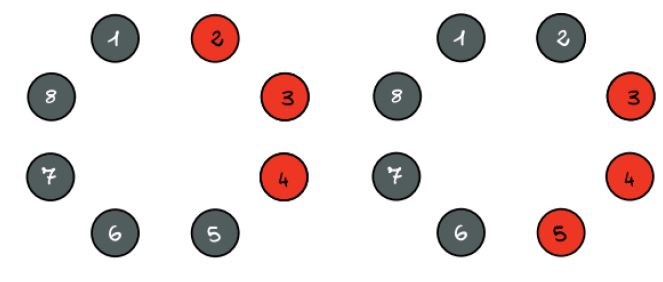


1)se consideriamo i 3 nodi non funzionanti tutti consecutivi, allora il numero di configurazioni ”errate” è pari ad 8

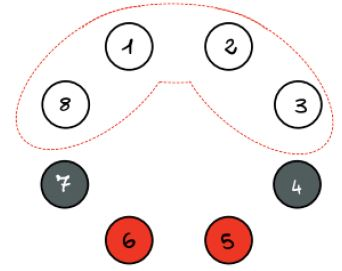


2)se consideriamo solo 2 nodi non funzionanti adiacenti, e l’altro in una qualsiasi altra posizione non adiacente a questi due (per intenderci, se considero il nodo 2 e 3 come non funzionanti,il terzo nodo non funzionante deve essere un altro qualsiasi che non sia o 1 o 4).In questo caso avrò 8 configurazioni tenendo fissi i due nodi adiacenti, ed ognuna di queste 8 configurazioni avrà altre 4 sottoconfigurazioni possibili andando a spostare il nodo ”libero”.

Quindi avrò 4*8 = 32 configurazioni nel secondo caso più le 8 configurazioni
del primo caso, quindi un totale di 56 - 40 configurazioni da considerare.
Otteniamo quindi la seguente espressione:

$ 16(1 - R_m)^3 \cdot R^{5m} $




5.   **Caso i=4, quattro nodi guasti**:
      In questa casistica esistono 70 configurazioni differenti in cui posso disporre i 4 nodi funzionanti ed i 4 non funzionanti; `e facilmente intuibile però che solo se alterno un nodo funzionante ad uno non funzionante il sistema funziona; ottengo quindi solo 2 configurazioni giuste;Le due possibili combinazioni in cui il sistema funziona nel caso di 4 nodi guasti.Il sistema quindi non funziona in 70-2=68 combinazioni, il termine della sommatoria è quindi pari a:
  
  $ 2(1 - R_m)^4 \cdot R^{4m} $





La reliability totale dei sistema si ottiene quindi andando a sommare le espressioni ricavate in precedenza:

$ R_{\text{sys}} = 1 \cdot R^{8m} + 8(1 - R_m)^1 \cdot R^{7m} + 20(1 - R_m)^2 \cdot R^{6m} + 16(1 - R_m)^3 \cdot R^{5m} + 2(1 - R_m)^4 \cdot R^{4m} $


La seconda parte della traccia ci chiede di considerare la reliability Rm con
una legge esponenziale ed una failure rate di 0.005 per ora, otteniamo la seguente equazione:

**$ R_m = e^{-\lambda t} \approx 0.786 $**

Andando a sostituire tale valore all’interno della reliability dell’espressione
precedente, otteniamo che **$ R_{\text{sys}} = 0.729 $**


L’esercizio poteva essere risolto anche in un altro modo: potevamo fare una
**Fault Tree Analysis**, in cui andiamo ad analizzare i possibili fallimenti; in questo caso, siccome il fallimento è dato da due nodi adiacenti che non funzionano, otteniamo il seguente albero i cui minimal cut set sono i nodi adiacenti che assumono dei valori booleani (1 se il nodo è fallito, 0 se il nodo funziona); il fallimento si avrà quando dalla uscita abbiamo il valore 1:

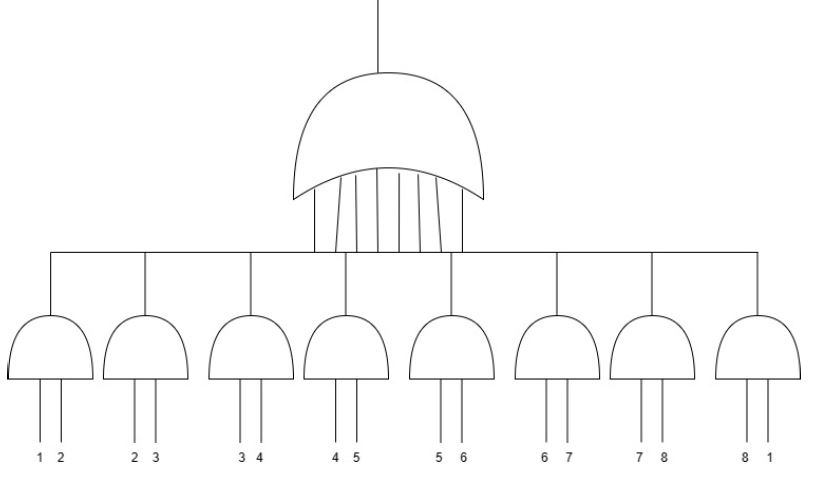

In [ ]:
from sympy import symbols, simplify, Or, And

# Define symbolic variables
N1, N2, N3, N4, N5, N6, N7, N8 = symbols('N1 N2 N3 N4 N5 N6 N7 N8')

# Define logical expression
logical_expression = Or(And(N1, N2), And(N2, N3), And(N3, N4), And(N4, N5),
                        And(N5, N6), And(N6, N7), And(N7, N8), And(N8, N1))

# Simplify the logical expression
simplified_expression = simplify(logical_expression)

print(simplified_expression)



(N1 & N2) | (N1 & N8) | (N2 & N3) | (N3 & N4) | (N4 & N5) | (N5 & N6) | (N6 & N7) | (N7 & N8)
